### Problem Statement
Build a model to understand how the demand for shared bikes based on the features available

### Reading and understanding the data

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
pwd

'C:\\Users\\ravissant.markenday\\Upgrad Study\\Linear Regression'

In [5]:
sharedBikes = pd.DataFrame(pd.read_csv("day.csv"))
#sharedBikes = pd.DataFrame(pd.read_csv("day_new.csv"))
sharedBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Inspection

In [7]:
sharedBikes.shape

(730, 16)

In [8]:
sharedBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
sharedBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [11]:
# Checking Null values
sharedBikes.isnull().sum()*100/sharedBikes.shape[0]
# There are no NULL values in the dataset, hence it is clean.

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [12]:
# Drop  casual as it won't be useful in the overall analysis
sharedBikes.drop(labels = 'casual', axis = 1, inplace = True)

In [13]:
# Drop  registered as it won't be useful in the overall analysis
sharedBikes.drop(labels = 'registered', axis = 1, inplace = True)

In [14]:
# Drop  instant as it won't be useful in the overall analysis
sharedBikes.drop(labels = 'instant', axis = 1, inplace = True)

In [15]:
# Drop dteday as month and year already captured
sharedBikes.drop(labels = 'dteday', axis = 1, inplace = True)

In [16]:
sharedBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [17]:
sharedBikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [18]:
num_cols=["cnt", "temp","atemp","hum","windspeed"]
cat_cols=["season","yr", "mnth", "holiday","weekday","workingday","weathersit"]

### Exploratory Data Analysis

#### Univariate Analysis


##### Count (Target Variable)

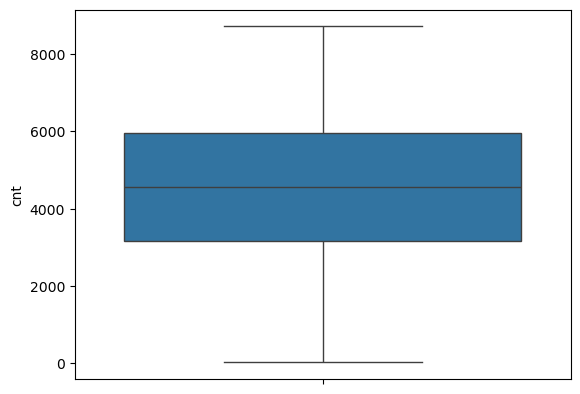

In [22]:
sns.boxplot(sharedBikes['cnt'])
plt.show()

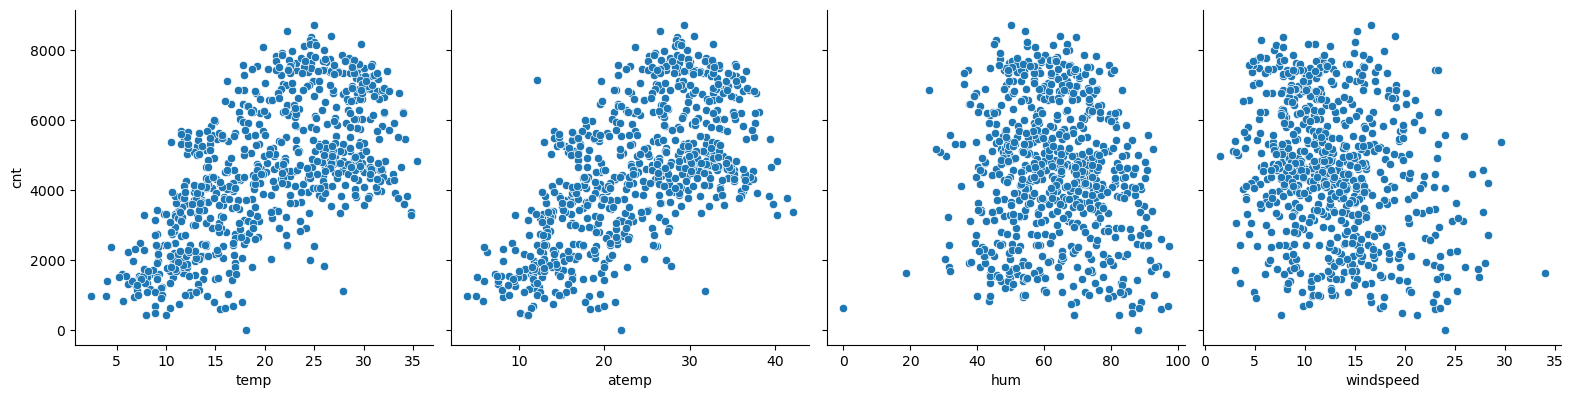

In [23]:
sns.pairplot(sharedBikes, x_vars=["temp","atemp","hum","windspeed"], y_vars='cnt', height=4, aspect=1, kind='scatter')
##sns.pairplot(sharedBikes, x_vars=["season","yr", "mnth", "holiday","weekday","workingday","weathersit"], y_vars='cnt', height=4, aspect=1, kind='scatter')
plt.show()

##### Weekday

<Axes: xlabel='weekday', ylabel='cnt'>

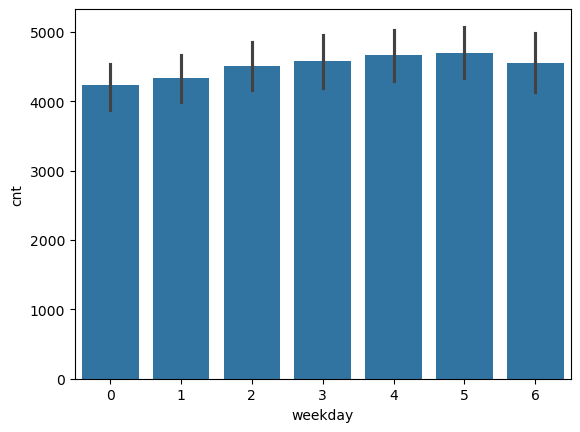

In [25]:
sns.barplot(data = sharedBikes,x='weekday', y='cnt')

##### Weekend

<Axes: xlabel='workingday', ylabel='cnt'>

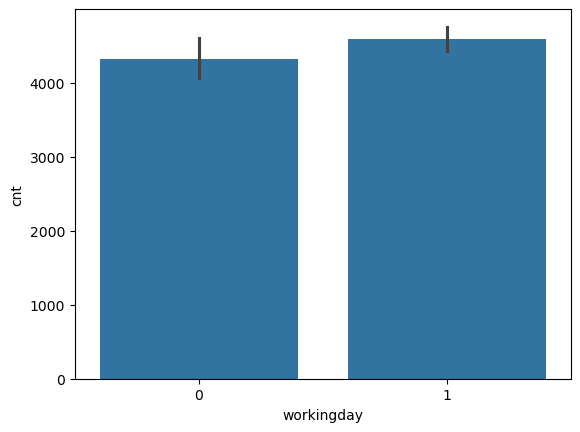

In [27]:
sns.barplot(data = sharedBikes,x='workingday', y='cnt')

##### Holiday

<Axes: xlabel='holiday', ylabel='cnt'>

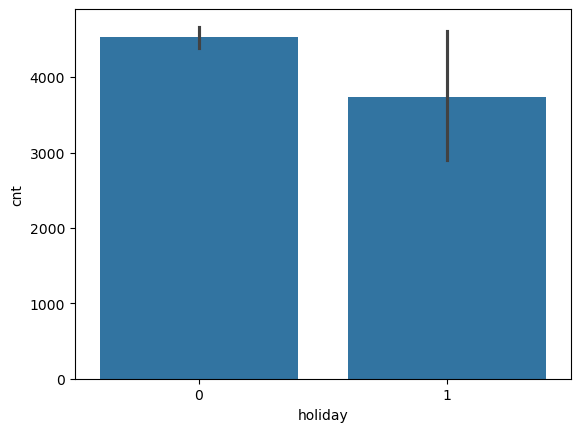

In [29]:
sns.barplot(data = sharedBikes,x='holiday', y='cnt')

##### Month

<Axes: xlabel='mnth', ylabel='cnt'>

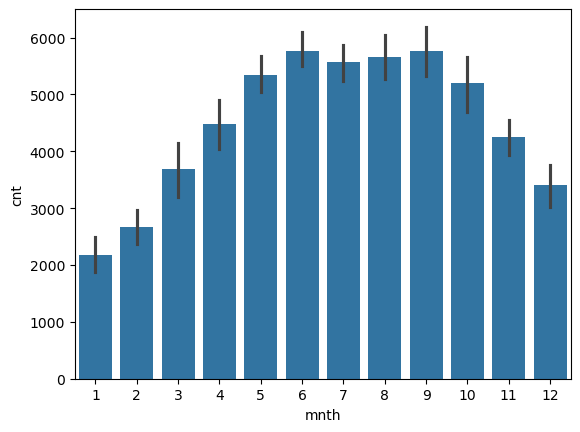

In [31]:
sns.barplot(data = sharedBikes,x='mnth', y='cnt')

##### Year

<Axes: xlabel='yr', ylabel='cnt'>

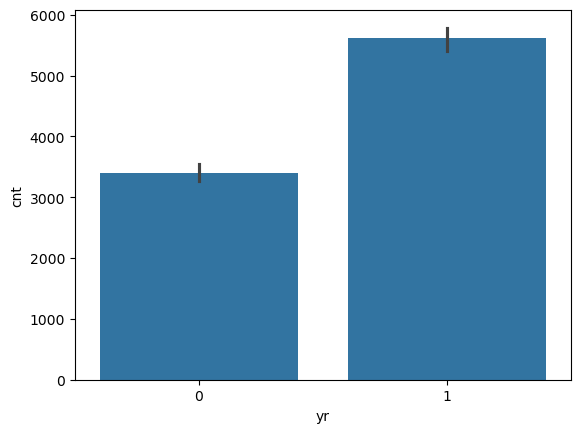

In [33]:
sns.barplot(data = sharedBikes,x='yr', y='cnt')

##### Season

<Axes: xlabel='season', ylabel='cnt'>

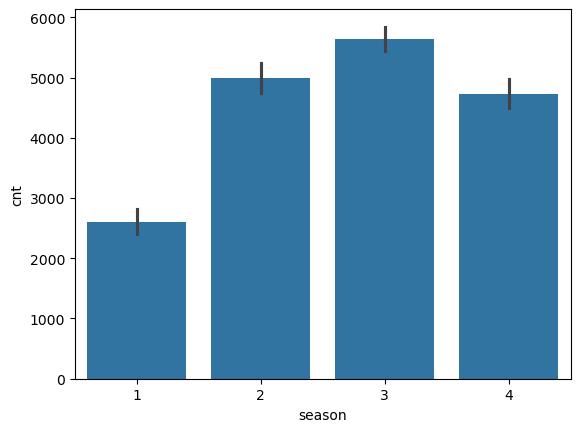

In [35]:
sns.barplot(data = sharedBikes,x='season', y='cnt')

##### Weather Situation

<Axes: xlabel='weathersit', ylabel='cnt'>

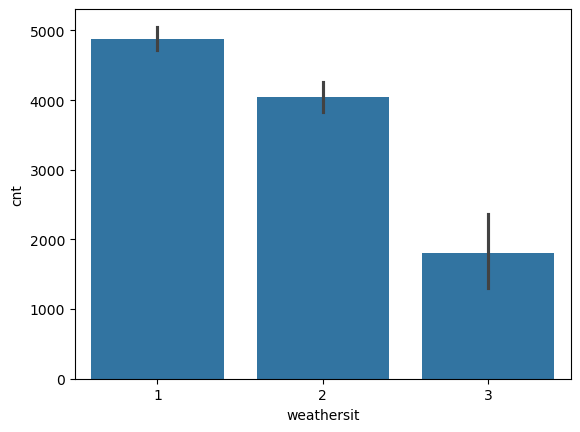

In [37]:
sns.barplot(data = sharedBikes,x='weathersit', y='cnt')

## Pre Processing

### Dummy Variable Creation

In [39]:
# Wherever we have more than 2 categories in categorical features, we need to create dummies for them

sharedBikes[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [40]:
#dum = pd.get_dummies(data=sharedBikes, columns=['season','mnth', 'weekday', 'weathersit'] ,drop_first=True,dtype=int)
dum1 = pd.get_dummies(sharedBikes['season'] , prefix = 'season',drop_first=True,dtype=int)
dum2 = pd.get_dummies(sharedBikes['mnth'] , prefix = 'mnth', drop_first=True,dtype=int)
dum3 = pd.get_dummies(sharedBikes['weekday'] , prefix = 'weekday',drop_first=True,dtype=int)
dum4 = pd.get_dummies(sharedBikes['weathersit'], prefix = 'weathersit' ,drop_first=True,dtype=int)
#dum.shape

In [41]:
#print(dum1)
#print(dum1.columns)
print(dum1.head)


<bound method NDFrame.head of      season_2  season_3  season_4
0           0         0         0
1           0         0         0
2           0         0         0
3           0         0         0
4           0         0         0
..        ...       ...       ...
725         0         0         0
726         0         0         0
727         0         0         0
728         0         0         0
729         0         0         0

[730 rows x 3 columns]>


In [42]:
sharedBikes=pd.concat([sharedBikes,dum1,dum2,dum3,dum4],axis=1)
#sharedBikes.columns
sharedBikes.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [43]:
sharedBikes=sharedBikes.drop(["season"],axis=1)
sharedBikes=sharedBikes.drop(["mnth"],axis=1)
sharedBikes=sharedBikes.drop(["weekday"],axis=1)
sharedBikes=sharedBikes.drop(["weathersit"],axis=1)



In [44]:
sharedBikes.shape

(730, 30)

In [45]:
sharedBikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [46]:
sharedBikes.columns=sharedBikes.columns.astype(str)
## important step to avoid : TypeError(in scaling): Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

### Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(sharedBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler


In [51]:
scaler=MinMaxScaler()


In [52]:
# Apply scaler() to all the numerical columns columns except the 'yes-no/(0/1)' and 'dummy' variables

#num_cols =  ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] # defined above

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [53]:
df_train.head

<bound method NDFrame.head of      yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
..   ..      ...         ...       ...       ...       ...        ...   
526   1        0           1  0.824514  0.762183  0.605840   0.355596   
578   1        0           1  0.863973  0.824359  0.679690   0.187140   
53    0        0           1  0.202618  0.218747  0.435939   0.111379   
350   0        0           0  0.248216  0.223544  0.577930   0.431816   
79    0        0           1  0.462664  0.434043  0.759870   0.529881   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
653  0.864243         

In [54]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


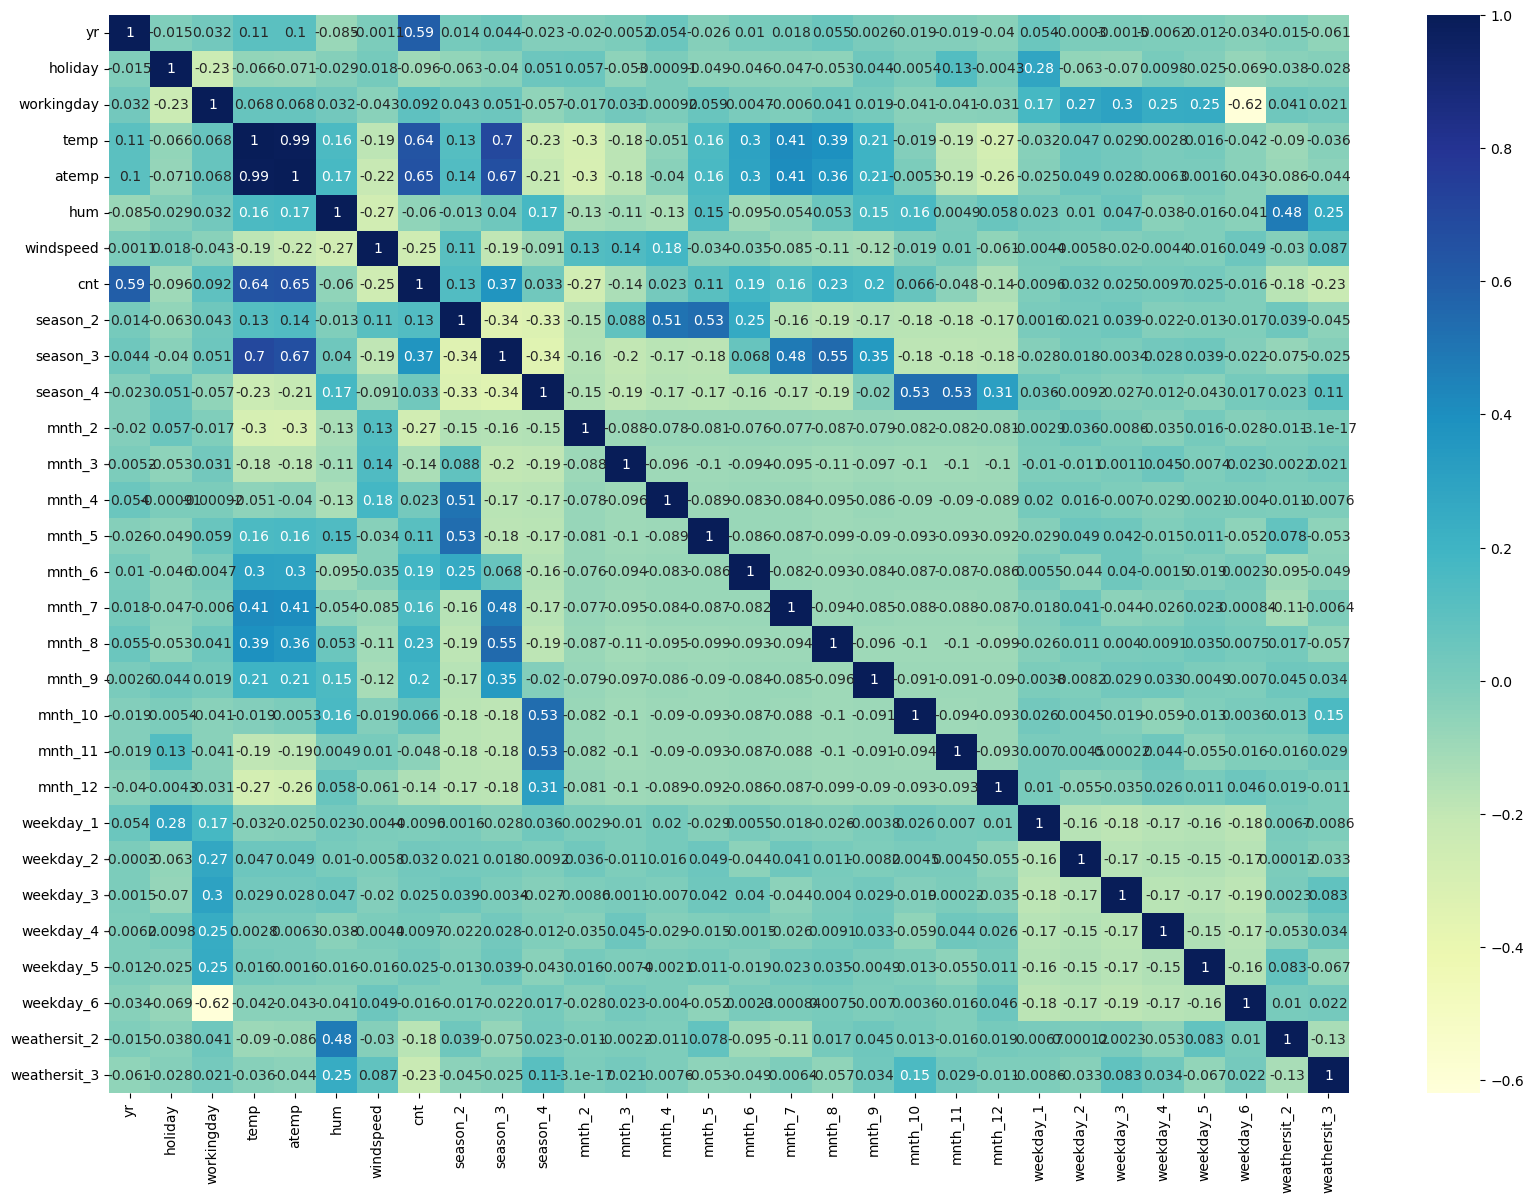

In [55]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 14))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [56]:
# As evident from the heat map atemp seems most correlated to demand(cnt) , temp & atemp in turn seem highly correlated hence one of them could potentially be dropped

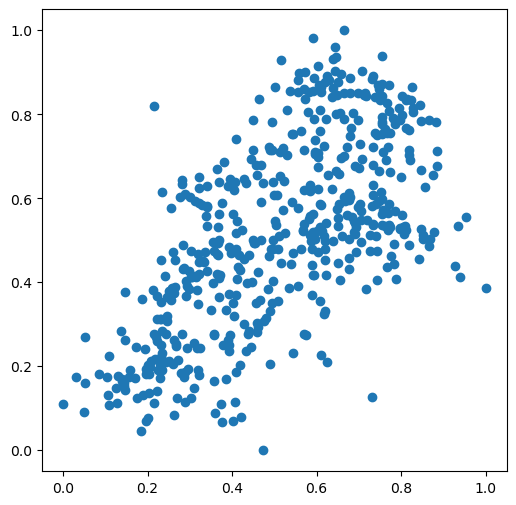

In [57]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [59]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building the model

### RFE
Recursive feature elimination

In [62]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)   # running RFE
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 7),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 10),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 16),
 ('weekday_2', False, 17),
 ('weekday_3', False, 19),
 ('weekday_4', False, 20),
 ('weekday_5', False, 18),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [65]:
col = X_train.columns[rfe.support_]  ## Selected columns
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [66]:
X_train.columns[~rfe.support_]  ## Removed columns

Index(['workingday', 'atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [68]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [69]:
# Adding a constant  
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [70]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [71]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.16e-186
Time:                        13:30:32   Log-Likelihood:                 494.69
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2762      0.026     10.565   

In [72]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.01
2,temp,8.51
4,windspeed,3.57
0,yr,2.01
5,season_2,1.81
6,season_4,1.74
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


In [74]:
## hum has VIF>5 (High correlation with other variables and hence needs to be dropped
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [75]:
#Rebuilding the model without 'hum'

In [76]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [77]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [78]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     229.8
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.24e-171
Time:                        13:30:32   Log-Likelihood:                 455.77
No. Observations:                 510   AIC:                            -891.5
Df Residuals:                     500   BIC:                            -849.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0897      0.017      5.151   

In [79]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'weathersit_3'],
      dtype='object')

In [80]:
#X_train_new = X_train_new.drop(['const'], axis=1)

In [81]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.78
6,mnth_8,1.57
5,season_4,1.45
7,mnth_9,1.29
8,weathersit_3,1.06
1,holiday,1.04


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
y_train_cnt = lm.predict(X_train_lm)

In [84]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

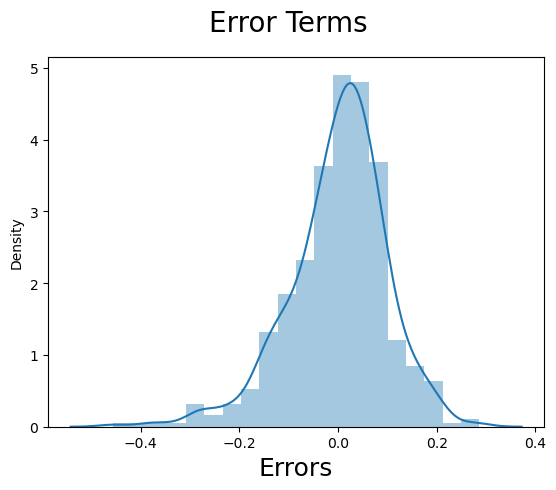

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [86]:
## We can see from the above that the error terms are normally distributed

## Making Predictions

#### Applying the scaling on the test sets

In [89]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

#### Dividing into X_test and y_test


In [91]:
y_test = df_test.pop('cnt')
X_test = df_test
#print(X_test)

In [92]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [93]:
# Making predictions

y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

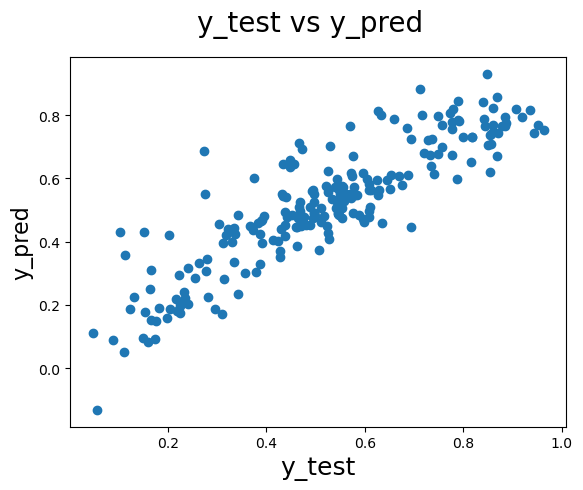

In [96]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## R-Squared Score Of Test Set

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7736064262516151